In [2]:
from tensorflow import keras

In [29]:
model = keras.models.load_model("best-cnn-model.h5")

In [30]:
model.layers

In [31]:
conv_layer = model.layers[0]
conv_layer.weights[0].shape # 커널에 적용된 가중치

TensorShape([3, 3, 1, 32])

In [32]:
conv_layer.weights[1].shape  # 절편

TensorShape([32])

In [33]:
# 특성맵 시각화
(x_train,y_train),(x_target,y_target)= keras.datasets.fashion_mnist.load_data()

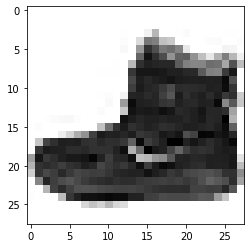

In [34]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray_r')
plt.show()

In [19]:
# 위의 셈플을 Conv2D 층이 만드는 특성 맵을 출력

# 신경망 모델 사용할때 Sequential 클래스를 사용 -- >층을 차례대로 모델을 쌓는데 사용
# 본격적인 딥러닝을 사용하면 모델이 복잡해 지고.. Sequential클래스를 사용하기가 힘듦
# 대안으로 나온것이 함수형 API 

In [49]:
# 사용방법  Dense층이 2개인 완전연결 신경망을 함수형 api로 구현


inputs = keras.Input(shape=(28,28))
flatten= keras.layers.Flatten()
dense1 = keras.layers.Dense(100,activation='relu')
dense2 = keras.layers.Dense(10,activation='softmax')

start =  flatten(inputs)
hidden =  dense1(start)
outputs =  dense2(hidden)

non_train_model = keras.Model(inputs,outputs)

In [36]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_3_input')>

In [37]:
model.layers

In [38]:
model.layers[0].output # 합성곱의 출력정보

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_3')>

In [74]:
concat_model =  keras.Model(model.input,model.layers[0].output )

In [75]:
temp_input = x_train[:1].reshape(-1,28,28,1) / 255.0
feature_map =  concat_model.predict(temp_input)
x_train[:1].shape, feature_map.shape

((1, 28, 28), (1, 28, 28, 32))

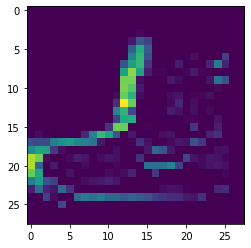

In [76]:
feature_map[0,:,:,0].shape
plt.imshow(feature_map[0,:,:,4])

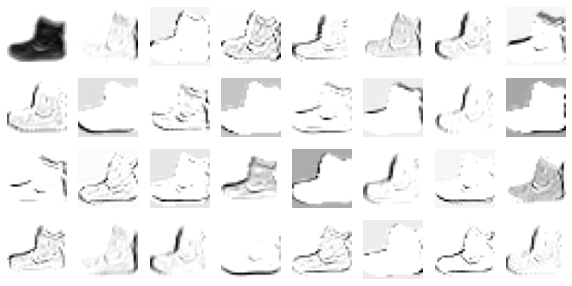

In [77]:
fig, axs =  plt.subplots(4,8, figsize=(10,5))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_map[0,:,:,i*8+j], cmap='gray_r' )
        axs[i,j].axis('off')
plt.show()        

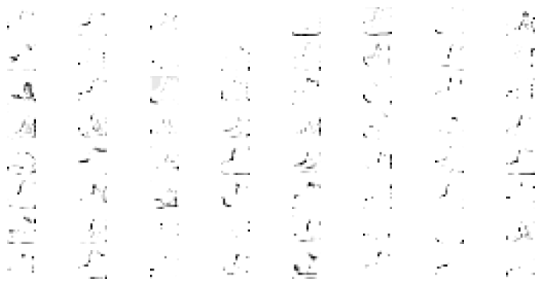

In [78]:
# 64 2번째 합성곱   
concat_model =  keras.Model(model.input,model.layers[2].output )

temp_input = x_train[:1].reshape(-1,28,28,1) / 255.0
feature_map =  concat_model.predict(temp_input)
x_train[:1].shape, feature_map.shape

fig, axs =  plt.subplots(8,8, figsize=(10,5))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_map[0,:,:,i*8+j], cmap='gray_r' )
        axs[i,j].axis('off')
plt.show()  